In [1]:
import cv2
import tqdm
import matplotlib.pyplot as plt

from efootball.src.classes.models.HomographyProjection import HomographyProjection
from efootball.src.classes.models.TeamsSegmentation import TeamsSegmentation
from efootball.src.classes.models.PersonDetector import PersonDetector
from efootball.src.utils.visualization import draw_based_on_predictions

Segmentation Models: using `keras` framework.


c:\Users\ferna\anaconda3\envs\efootball\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cap = cv2.VideoCapture("C:/Users/ferna/OneDrive/Documentos/Insper/efootball/data/input/08fd33_0.mp4")
fps = cap.get(cv2.CAP_PROP_FPS)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [2]:
homography = HomographyProjection(backbone="efficientnetb3", num_classes=29, input_shape=(1080, 1920, 3), output_shape=(320,320))
person_detector = PersonDetector(threshold=0.6)
teams_segmentation = TeamsSegmentation(num_clusters=4)

progress_bar = tqdm.tqdm(total=n_frames)
for i in range(n_frames):
    _, frame = cap.read()
    if i == 0:
        teams_segmentation.define_teams_colors(frame)

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


    person_predictions = person_detector.detect_persons(frame)
    player_predictions = teams_segmentation.get_players(frame, person_predictions)

    homography_prediction = homography.project_players_position(frame, player_predictions)
    draw_based_on_predictions(frame, player_predictions)
    if homography_prediction is not None:
        frame[760:1080, 1600:1920] = homography_prediction
    homography.visualize(frame)
    progress_bar.update(1)
progress_bar.close()
cap.release()

In [3]:
field_image = cv2.imread('C:/Users/ferna/OneDrive/Documentos/Insper/Efootball/data/frames/10.png')
field_image = cv2.cvtColor(field_image, cv2.COLOR_BGR2RGB)
image_with_persons = field_image.copy()
field_image = cv2.resize(field_image, (320, 320))
points_field_image = field_image.copy()

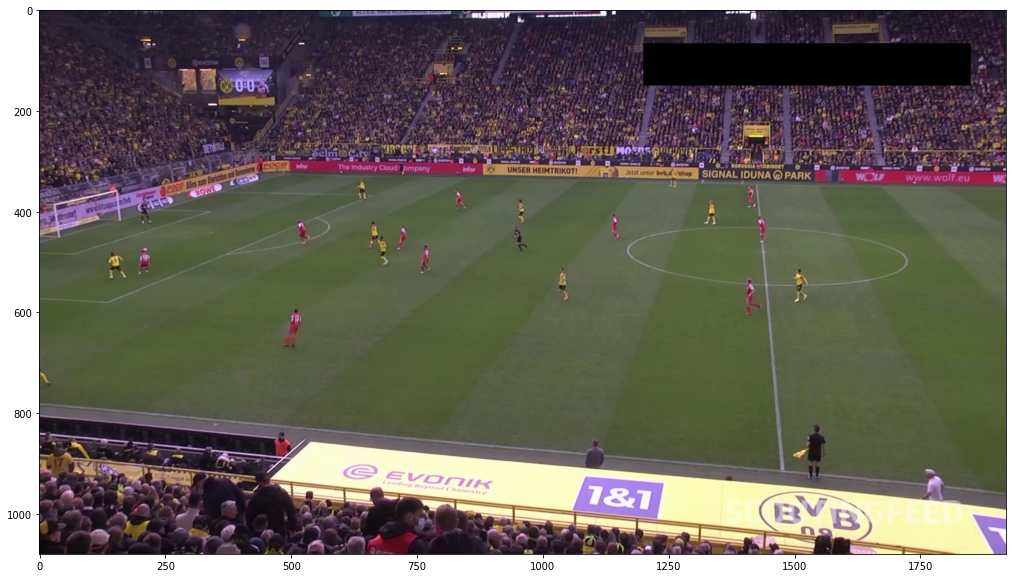

In [4]:
homography.visualize(image_with_persons)

In [5]:
teams_segmentation.define_teams_colors(image_with_persons)

c:\Users\ferna\anaconda3\envs\efootball\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
c:\Users\ferna\anaconda3\envs\efootball\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
person_predictions = person_detector.detect_persons(image_with_persons)
player_predictions = teams_segmentation.get_players(image_with_persons, person_predictions)

In [7]:
prediction = homography.project_players_position(image_with_persons, player_predictions)

[[[[6.47721419e-14 3.06730857e-14 1.10999121e-13 ... 3.65166149e-13
    5.22609679e-13 1.00000000e+00]
   [1.16888479e-18 3.39939127e-19 1.02390468e-17 ... 3.81571799e-18
    2.19397601e-18 1.00000000e+00]
   [4.03077238e-17 8.82960710e-18 6.17147623e-16 ... 8.41233154e-17
    4.67046556e-17 1.00000000e+00]
   ...
   [2.61647799e-17 5.10420317e-18 1.01087665e-16 ... 1.55292347e-16
    6.51566529e-17 1.00000000e+00]
   [8.34166980e-19 6.71840876e-20 1.39186559e-18 ... 3.05137229e-18
    2.57740607e-18 1.00000000e+00]
   [1.10668067e-13 1.58152842e-14 7.56769186e-14 ... 1.55549889e-13
    1.65874083e-13 1.00000000e+00]]

  [[5.18774334e-20 3.18145425e-20 2.72959211e-19 ... 5.73432155e-19
    1.04245509e-18 1.00000000e+00]
   [1.19112958e-26 2.22858406e-27 9.07866785e-25 ... 1.43257412e-25
    2.34554601e-26 1.00000000e+00]
   [6.28448841e-24 6.18377365e-25 8.81696682e-22 ... 2.64014169e-23
    5.09642483e-24 1.00000000e+00]
   ...
   [3.72755750e-24 1.31242493e-24 1.12597437e-22 ... 6.64

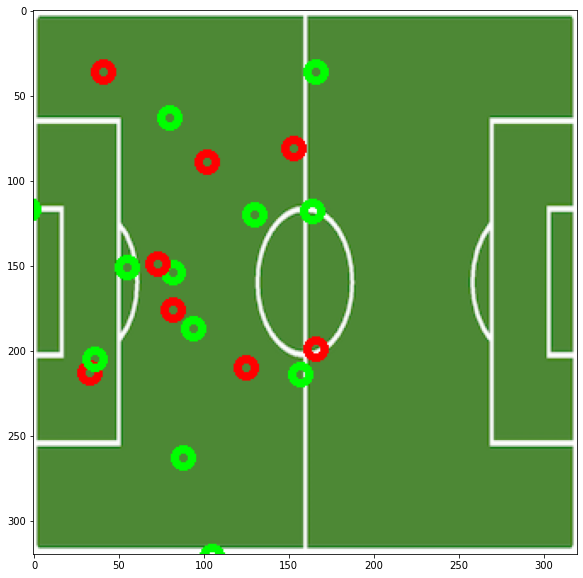

In [8]:
homography.visualize(prediction)